### Predicting Wine Quality using Machine Learning Techniques


In [1]:
## Importing the required basic Libraries to perform EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Importing the dataset

df = pd.read_csv("winequality.csv")
copy_df = df.copy()
copy_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis(Univariate Analysis)

In [3]:
# Viewing the number of rows and columns
copy_df.shape

(1599, 12)

In [4]:
# Basic Information about data
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Checking for null values
copy_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
 # Analyzing basic statistics about the data
copy_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Viewing the column names
copy_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

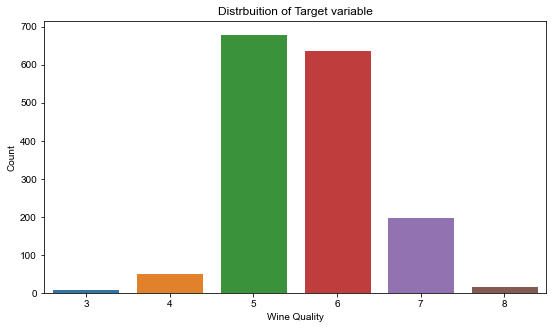

In [8]:
# Distrbuition of Target variable
fig,ax = plt.subplots(figsize = (9,5))
sns.set_style("darkgrid")
sns.countplot(x = 'quality',data = copy_df);
plt.title("Distrbuition of Target variable")
plt.xlabel("Wine Quality")
plt.ylabel("Count");



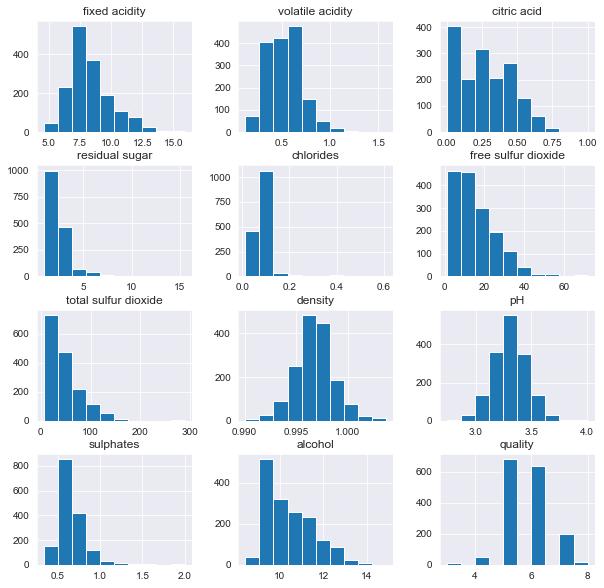

In [9]:
# Checking distribution for entire dataframe using hist function
copy_df.hist(figsize = (10,10));

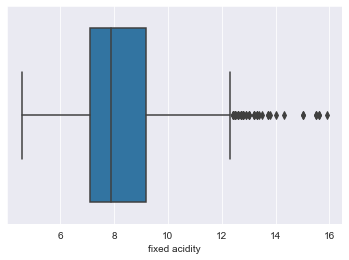

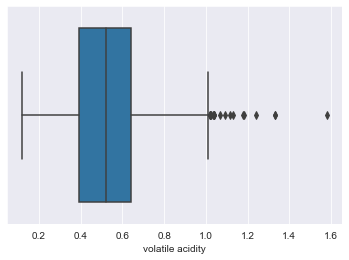

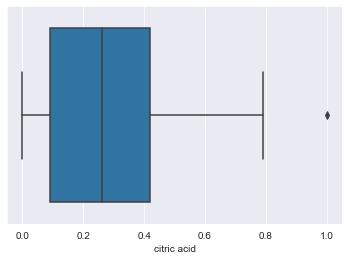

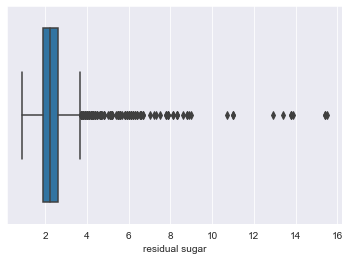

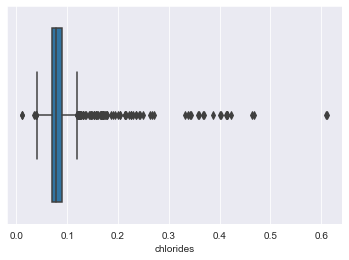

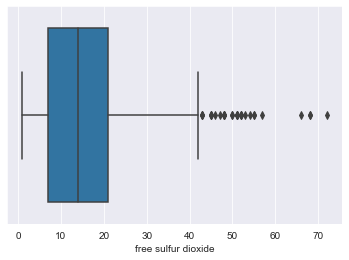

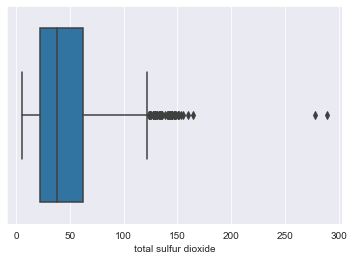

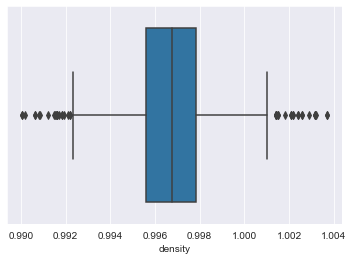

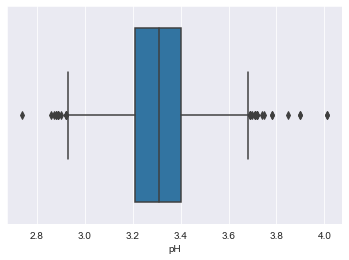

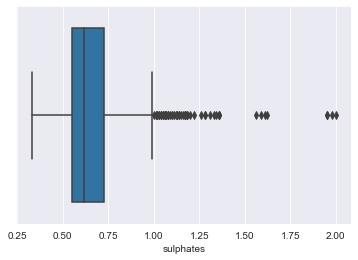

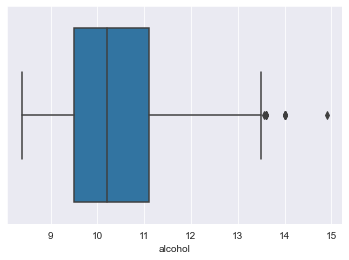

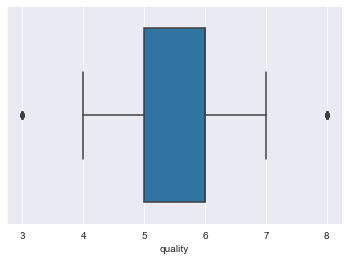

In [10]:
#Boxplot to detect outliers
sns.set_style("darkgrid")
for i in copy_df.columns:
    fig,ax = plt.subplots()
    sns.boxplot(x=i,data=copy_df);

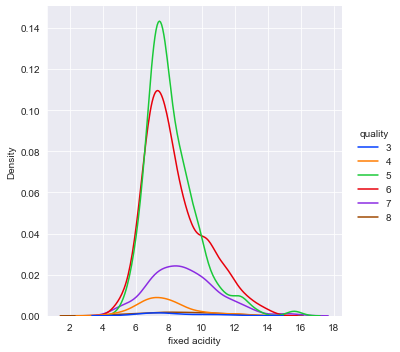

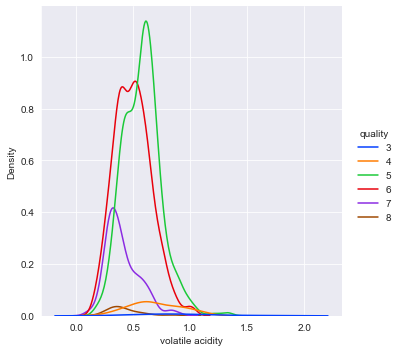

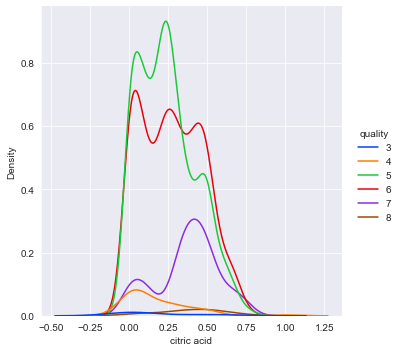

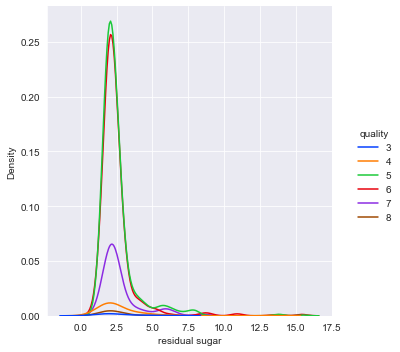

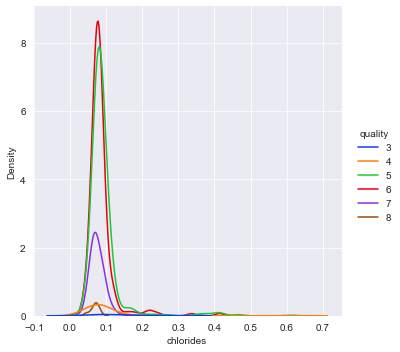

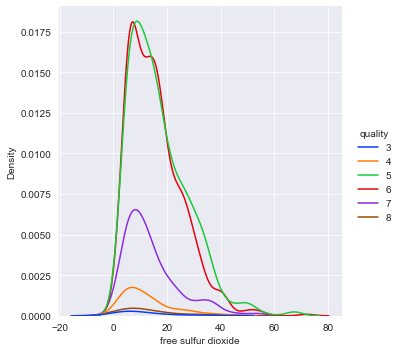

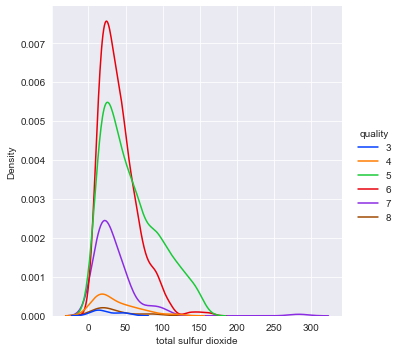

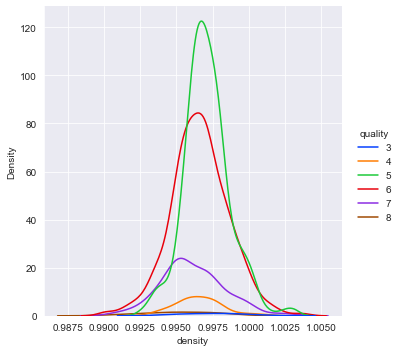

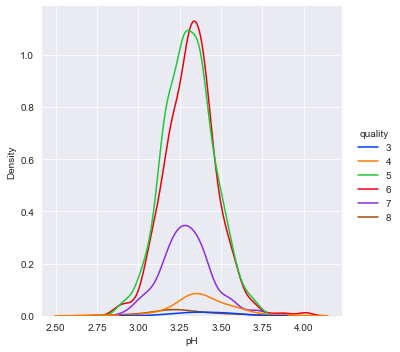

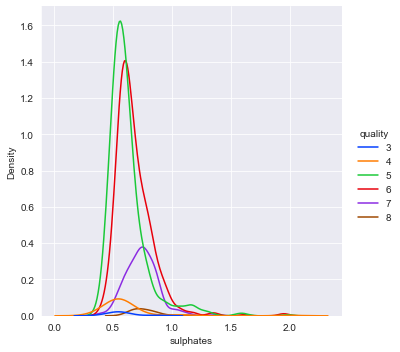

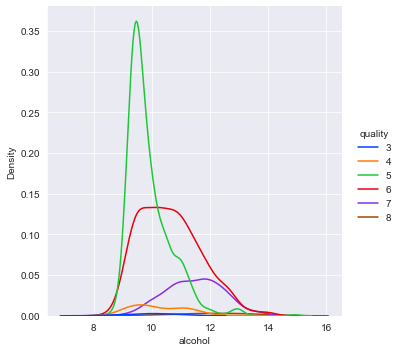

In [11]:
#Checking whether the columns are normally distributed
for i in copy_df.columns:
    if i!= "quality":
        sns.displot(x = i,data = copy_df,hue = "quality",kind = "kde",palette = "bright")

In [12]:
copy_df["Best Quality"] = [0 if x<7 else 1 for x in copy_df["quality"]]

In [13]:
copy_df["Best Quality"].value_counts()

0    1382
1     217
Name: Best Quality, dtype: int64

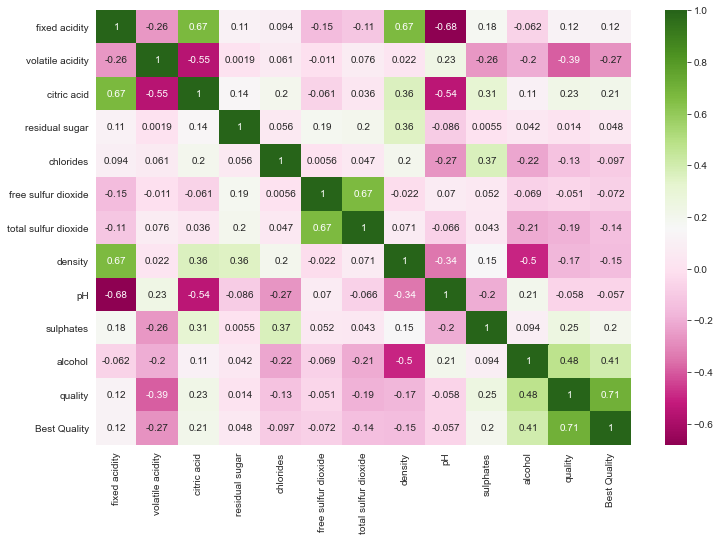

In [69]:
## Correlation Matrix for finding out the relationships between different variables
fig,ax = plt.subplots(figsize=(12,8))
corr_matrix = sns.heatmap(copy_df.corr(),annot = True,cmap = "PiYG")

In [19]:
copy_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [37]:
X = copy_df.drop(columns = ["quality","Best Quality"])
X_columns = X.columns
y = copy_df["Best Quality"]

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

### Modelling

#### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9125

In [84]:
rf_preds = rf.predict(X_test)
rf_report =(classification_report(y_test,rf_preds))
print(rf_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       347
           1       0.75      0.51      0.61        53

    accuracy                           0.91       400
   macro avg       0.84      0.74      0.78       400
weighted avg       0.90      0.91      0.91       400



In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 5,n_repeats = 2,random_state = 42)
rf_scores = cross_val_score(rf,X,y,scoring = "accuracy",cv=cv,n_jobs = 1)


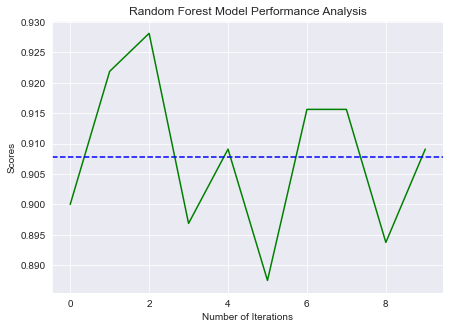

In [43]:
fig,ax = plt.subplots(figsize = (7,5))
sns.set_style("darkgrid")
plt.plot(rf_scores,color = "green");
plt.axhline(y = rf_scores.mean(),linestyle = "--",color = "blue")
plt.xlabel("Number of Iterations")
plt.ylabel("Scores")
plt.title("Random Forest Model Performance Analysis");

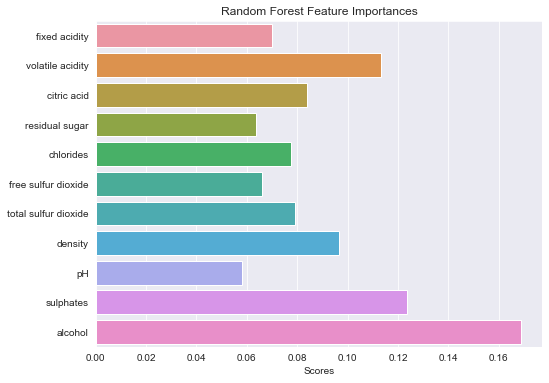

In [83]:
#  Calculating Feature Importance

featureScores = pd.Series(rf.feature_importances_,index = X_columns)
featureScores = pd.DataFrame(featureScores,columns = ["Scores"])
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(y= featureScores.index,x=featureScores["Scores"]);
plt.title("Random Forest Feature Importances");



#### Logistic Regressor


In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.8775

In [85]:
lr_preds = lr.predict(X_test)
lr_report = classification_report(y_test,lr_preds)
print(lr_report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       347
           1       0.57      0.30      0.40        53

    accuracy                           0.88       400
   macro avg       0.74      0.63      0.66       400
weighted avg       0.86      0.88      0.86       400



In [92]:
#Cross validation

lr_scores = cross_val_score(lr,X,y,scoring = "accuracy",cv=cv,n_jobs = 1)

In [93]:
lf_scores

array([0.86875   , 0.884375  , 0.9       , 0.859375  , 0.89655172,
       0.871875  , 0.8875    , 0.89375   , 0.878125  , 0.86520376])

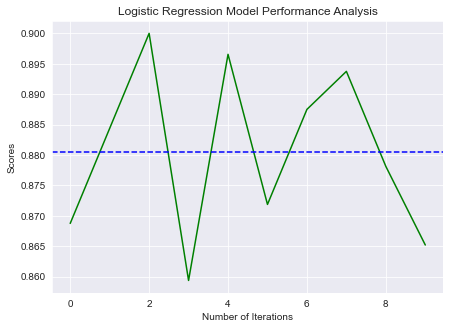

In [94]:
fig,ax = plt.subplots(figsize = (7,5))
sns.set_style("darkgrid")
plt.plot(lr_scores,color = "green");
plt.axhline(y = lr_scores.mean(),linestyle = "--",color = "blue")
plt.xlabel("Number of Iterations")
plt.ylabel("Scores")
plt.title("Logistic Regression Model Performance Analysis");

In [95]:
lr.coef_

array([[ 0.41482185, -0.50779132,  0.04129206,  0.31233414, -0.3228609 ,
         0.13349752, -0.60715452, -0.4342251 ,  0.00625067,  0.53692222,
         0.81950197]])

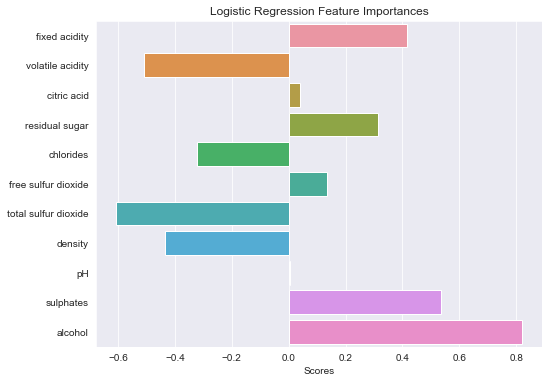

In [102]:
#  Calculating Feature Importance

featureScores = pd.Series(lr.coef_[0],index = X_columns)
featureScores = pd.DataFrame(featureScores,columns = ["Scores"])
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(y= featureScores.index,x=featureScores["Scores"]);
plt.title("Logistic Regression Feature Importances");

